## データセットをダウンロード

https://www.microsoft.com/en-us/download/details.aspx?id=54765


In [3]:
!unzip ../dataset/kagglecatsanddogs_3367a.zip

9527.jpg  
  inflating: PetImages/Dog/9528.jpg  
  inflating: PetImages/Dog/9529.jpg  
  inflating: PetImages/Dog/953.jpg   
  inflating: PetImages/Dog/9530.jpg  
  inflating: PetImages/Dog/9531.jpg  
  inflating: PetImages/Dog/9532.jpg  
  inflating: PetImages/Dog/9533.jpg  
  inflating: PetImages/Dog/9534.jpg  
  inflating: PetImages/Dog/9535.jpg  
  inflating: PetImages/Dog/9536.jpg  
  inflating: PetImages/Dog/9537.jpg  
  inflating: PetImages/Dog/9538.jpg  
  inflating: PetImages/Dog/9539.jpg  
  inflating: PetImages/Dog/954.jpg   
  inflating: PetImages/Dog/9540.jpg  
  inflating: PetImages/Dog/9541.jpg  
  inflating: PetImages/Dog/9542.jpg  
  inflating: PetImages/Dog/9543.jpg  
  inflating: PetImages/Dog/9544.jpg  
  inflating: PetImages/Dog/9545.jpg  
  inflating: PetImages/Dog/9546.jpg  
  inflating: PetImages/Dog/9547.jpg  
  inflating: PetImages/Dog/9548.jpg  
  inflating: PetImages/Dog/9549.jpg  
  inflating: PetImages/Dog/955.jpg   
  inflating: PetImages/Dog/9550.jpg  
 

## グレイスケールで読み込み

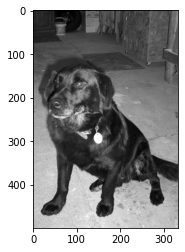

(500, 333)
[[ 41  42  43 ... 123 138 135]
 [ 39  40  41 ... 133 143 136]
 [ 40  41  41 ... 139 145 135]
 ...
 [207 194 213 ... 207 198 188]
 [203 190 212 ... 202 191 184]
 [172 168 204 ... 195 182 179]]


In [5]:
import matplotlib.pyplot as plt
import os
import cv2


DATADIR = "./PetImages"
CATEGORIES = ["Dog", "Cat"]

for category in CATEGORIES:
    path = os.path.join(DATADIR, category)

    for image_name in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, image_name), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break
    break
  
print(img_array.shape)
print(img_array)

## カラーで読み込み

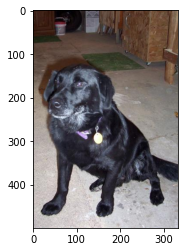

In [8]:
import matplotlib.pyplot as plt
import os
import cv2


DATADIR = "./PetImages"
CATEGORIES = ["Dog", "Cat"]

for category in CATEGORIES:
    path = os.path.join(DATADIR, category)

    for image_name in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, image_name), )
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        plt.imshow(img_array, cmap='gray')
        plt.show()
        break
    break

学習データのラベル： 1
学習データのラベル： 0
学習データのラベル： 0
学習データのラベル： 0


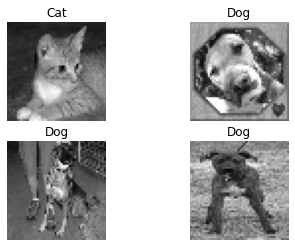

In [9]:
import matplotlib.pyplot as plt
import os
import cv2
import random
import numpy as np

DATADIR = "./PetImages"
CATEGORIES = ["Dog", "Cat"]
IMG_SIZE = 50
training_data = []

def create_training_data():
    for class_num, category in enumerate(CATEGORIES):
        path = os.path.join(DATADIR, category)
        for image_name in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, image_name), cv2.IMREAD_GRAYSCALE)  # 画像読み込み
                img_resize_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # 画像のリサイズ
                training_data.append([img_resize_array, class_num])  # 画像データ、ラベル情報を追加
            except Exception as e:
                pass

create_training_data()

random.shuffle(training_data)  # データをシャッフル

X_train = []  # 画像データ
y_train = []  # ラベル情報

# データセット作成
for feature, label in training_data:
    X_train.append(feature)
    y_train.append(label)

# numpy配列に変換
X_train = np.array(X_train)
y_train = np.array(y_train)

# データセットの確認
for i in range(0, 4):
    print("学習データのラベル：", y_train[i])
    plt.subplot(2, 2, i+1)
    plt.axis('off')
    plt.title(label = 'Dog' if y_train[i] == 0 else 'Cat')
    plt.imshow(X_train[i], cmap='gray')

plt.show()

学習データのラベル： 1
学習データのラベル： 0
学習データのラベル： 1
学習データのラベル： 0


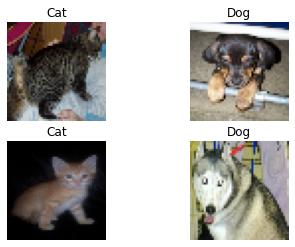

In [11]:
import matplotlib.pyplot as plt
import os
import cv2
import random
import numpy as np

DATADIR = "./PetImages"
CATEGORIES = ["Dog", "Cat"]
IMG_SIZE = 50

training_data = []

def create_training_data():
    for class_num, category in enumerate(CATEGORIES):
        path = os.path.join(DATADIR, category)
        for image_name in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, image_name),)  # 画像読み込み
                img_resize_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # 画像のリサイズ
                training_data.append([img_resize_array, class_num])  # 画像データ、ラベル情報を追加
            except Exception as e:
                pass

create_training_data()

random.shuffle(training_data)  # データをシャッフル

X = []  # 画像データ
y = []  # ラベル情報

# データセット作成
for feature, label in training_data:
    X.append(feature)
    y.append(label)

# numpy配列に変換
X = np.array(X)
y = np.array(y)

# データセットの確認
for i in range(0, 4):
    print("学習データのラベル：", y[i])
    plt.subplot(2, 2, i+1)
    plt.axis('off')
    plt.title(label = 'Dog' if y[i] == 0 else 'Cat')
    img_array = cv2.cvtColor(X[i], cv2.COLOR_BGR2RGB)
    plt.imshow(img_array)

plt.show()

`shape` でデータの次元数を確認する

50 x 50 の RGB であることがわかる

In [14]:
print(X.shape)
print(y.shape)

(24946, 50, 50, 3)
(24946,)


ホールドアウト法でデータセットを分割

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100,
                                                    stratify=y)

In [18]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(19956, 50, 50, 3)
(4990, 50, 50, 3)
(19956,)
(4990,)


`BGR` になっているので `RGB` に変更する。

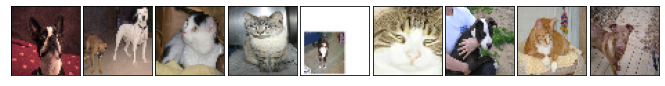

In [21]:
fig = plt.figure(figsize=(9, 15))
fig.subplots_adjust(left=0, right=1, bottom=0, top=0.5, hspace=0.05,
                    wspace=0.05)

for i in range(9):
    ax = fig.add_subplot(1, 9, i + 1, xticks=[], yticks=[])
    img_array = cv2.cvtColor(X_train[i], cv2.COLOR_BGR2RGB)
    ax.imshow(img_array, cmap='gray')

`X_train`, `X_test` は画素値を `255` で割ることで `0` ~ `1` に正規化する。

`y_train`, `y_test` は正解ラベルを One-hot エンコーディングする。keras を使うと簡単。

In [1]:
from tensorflow.keras.utils import to_categorical

X_train = X_train.reshape((X_train.shape[0], 50, 50, 3)) / 255
X_test = X_test.reshape((X_test.shape[0], 50, 50, 3)) / 255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

ModuleNotFoundError: No module named 'tensorflow'